# Проект 14 аналитика данных полученных посредством SQL запросов

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

# 1. Аналитика

In [40]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [96]:
query_1 = pd.read_csv('/datasets/query_1.csv') #  количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года

query_3 = pd.read_csv('/datasets/query_3.csv') #  среднее количество прибывающих рейсов в день для каждого города за август 2018 года

query_last = pd.read_csv('/datasets/query_last.csv')


In [12]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [9]:
query_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [8]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [10]:
query_3

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


Типы данных в query_1 и query_3 - корректные.

In [90]:
top = query_3.sort_values(by = 'average_flights', ascending = False)[:10]

In [91]:
top.head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


# Графики

<BarContainer object of 8 artists>

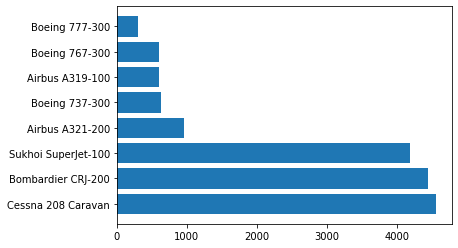

In [92]:
sort_query_1 = query_1.sort_values(by = 'flights_amount', ascending = False)
groups = sort_query_1['model']
counts = sort_query_1['flights_amount']
plt.barh(groups, counts)

вывод: низкая доля боингов. Если вы собираетесь купить акции боинга - время передумать.

в топе легкомоторные самолеты - они дешевые

<BarContainer object of 20 artists>

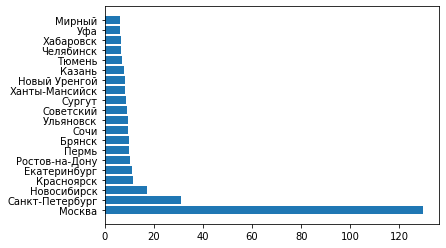

In [93]:
sort_query_3 = query_3.sort_values(by = 'average_flights', ascending = False)[:20]
groups = sort_query_3['city']
counts = sort_query_3['average_flights']
plt.barh(groups, counts)

Вывод: выше новосибирска доля городов снижается плавно

<BarContainer object of 10 artists>

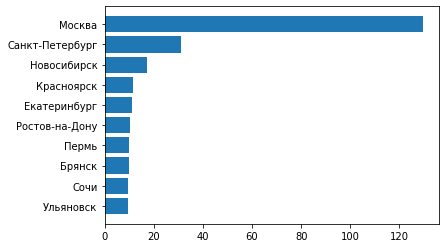

In [94]:
sort_top = top.sort_values(by = 'average_flights') # для топ 10 городов
groups = sort_top['city']
counts = sort_top['average_flights']
plt.barh(groups, counts)

Вывод: Москва - супер лидер, с огромной долей, снижение после новосибирска - почти не видно.

# 2. Проверка гипотезы

In [97]:
query_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [98]:
query_last

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


query_last - все типы данных корректные.

In [102]:
non_festival_week = query_last.loc[query_last['festival_week'].isna()]
have_festival_week = query_last.query('@query_last.index not in @non_festival_week.index')

from scipy import stats as st
import numpy as np

pages_per_session_autumn = non_festival_week['ticket_amount']
pages_per_session_summer = have_festival_week['ticket_amount']

alpha = 0.05 # ваш код: задайте критический уровень статистической значимости

results = st.ttest_ind(
    pages_per_session_autumn, 
    pages_per_session_summer) 

print('p-значение:' , results.pvalue)

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу:")
    print('средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время')
else:
    print("Не получилось отвергнуть нулевую гипотезу:")
    print('средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время')

p-значение: 0.09688869045922928
Не получилось отвергнуть нулевую гипотезу:
средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время


Общий вывод:

В топе - легкие самолёты.

Чаще всего - летают в москву

средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Станислав, действительно, работа на фоне других проектов кажется детским садом, вспомнить например, сборный проект после второго спринта)<br>
тут всё понятно. Комментировать нечего. ВОзможно, о проверке гипотез стоит ещё раз поговорить.<br>
    
Ты верно применил технику сравнения групп. Есть тест, есть р-уровень. Если р-уровень меньше 0.05 , то мы гворим, что средние значения в группах статистически различаются. Т.е. мы можем сказать, что одна группа отличается от другой.<br>  
    
При это у нас данных совсем мало 7 и 3 строк в группах сравнения.<br>
И тогда вопрос: на сколько можно доверять статистическим выводам?<br>    
Функция сравнения групп = st.ttest_ind - справедлива (читаем так: последующему выводу можно доверять) только в том случае, когда данные в подгруппах распределены нормально (и данных должно быть ну более 20-30 хотя бы для каждой группы). Если данные - не нормальные (или их мало как в нашем случае),то правильнее использовать метод непараметрической статистики - фукнцию mannwhitneyu (она как раз использует расчёт по медианам, когда данных мало).<br><br>
Какие последствия от неправильного использования методов сравнения двух групп? Почему важно понимать нормальность/ненормльность сравниваемых групп?<br>
А потому, что Можно сделать ложные выводы. А значит неверные управленческие решения.<br><br>
Это легко увидеть это на медицинском примере: ведь принятие решения о выводе лекарства на рынок (нового метода лечения) принимают именно используя эти техники, изучая две группы пациентов. И вот, скажем, метод расчёта показал, что гипотеза не подтвердилась - т.е. средние значени давления (допустим лекарство для снижения давления) в группах разные, т.е. лекарство реально помагает людям. И решили начать запуск лекарства на рынок. Но, т.к. использовали не тот метод анализа, вывод оказался ложным:(((<br>
т.е. не помогает оно на самом деле....<br><br>
 
Это я к тому, что вопрос достаточно серьёзный, по поводу использования техник сравнения групп между собой и принятия решения о разности между группами.<br>
И если Вам предстоит занимтаься эти вопросом в Вашей деятельности в будущем, то настоятельно рекомендую глубже изучить этот вопрос, чтобы на практике быть настоящим с точки зрения статистических расчётов.<br>
Ведь всё решает аналитик:))) А значит и ответственность тоже берёт на себя)))

ВОт, например, если использовать маннауитни в этой задаче, то выводы будут иными. Там критерий покажет, что статистически будут основания отвергнуть гипотезу. Т.е. спрос отличается в периоды проведения и не проведения фестивалей.<br>
    
Скорее всего, для бизнеса тут более провильно будет ответить так: данных мало, что быть уверенным в выодах на 100%, но есть подозрения, что спрос отличается в изучаемые периоды и дополниетльный сбор данных сможет это подтвердить.<br>

<font color='green'>    
УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ.